In [18]:
import os
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yaml
from flatten_dict import flatten

In [19]:
# Read a pickle file
def read_pickle(path):
    with open(path, "rb") as f:
        data = pickle.load(f)
    return data

In [20]:
# Read a yaml file
def read_yaml(path):
    with open(path) as f:
        data = yaml.safe_load(f)
    return data

In [21]:
# List the files in the directory
path = "/home/ghuizing/Documents/runs"
file_paths = [f"{path}/{file}/" for file in os.listdir(path)]

In [22]:
df = pd.DataFrame()
for file in file_paths:
    if (
        "growth" not in file
        and "midbrain" not in file
        and "notf" not in file
        and "implicit" not in file
        and "tensteps" not in file
        and ".log" not in file
    ):
        try:
            data = flatten(read_pickle(file + "scores.pkl"), reducer="underscore")
            config = flatten(read_yaml(file + "config.yaml"), reducer="underscore")
            # Convert the list-typed values in config to strings
            for key, value in config.items():
                if isinstance(value, list):
                    config[key] = str(value)
            data.update(config)
            one_line_df = pd.DataFrame(data, index=[file.split("/")[-2]])
            df = pd.concat([df, one_line_df])
        except Exception as e:
            print(f"Error in {file}: {e}")

In [23]:
df.head()

,sinkhorn_train_timepoint,sinkhorn_train_sinkhorn_train,sinkhorn_train_sinkhorn_train_div,sinkhorn_train_quad_sinkhorn_train,sinkhorn_train_lin_sinkhorn_train,sinkhorn_early_test_timepoint,sinkhorn_early_test_sinkhorn_early_test,sinkhorn_early_test_sinkhorn_early_test_div,sinkhorn_early_test_quad_sinkhorn_early_test,sinkhorn_early_test_lin_sinkhorn_early_test,...,wandb_mode,organism_dataset_path,organism_omics_key,organism_space_key,organism_weight_key,organism_annotation_key,organism_time_key,organism_train_batches,organism_early_test_batches,organism_late_test_batches
artista_june_quadratic_z50ni0tu,15.0,0.051982,0.001427,23.682325,0.045669,10.0,0.050177,0.001937,23.643196,0.045290,...,offline,/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghui...,X_pca_harmony,spatial,None,Annotation,time,"['Injury_2DPI_rep1_SS200000147BL_D5', 'Injury_...","['Injury_10DPI_rep2_SS200000147BL_B2', 'Injury...","['Injury_20DPI_rep3_SS200000147BL_B5', 'Injury..."
mosta_june_quadratic_f6u7pvfs,14.5,0.009024,0.000126,22.050464,0.008925,13.5,0.008030,0.000116,22.707344,0.007982,...,offline,/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghui...,X_pca_harmony,spatial,None,annotation,time,"['E9.5_E1S1', 'E10.5_E1S1', 'E11.5_E1S1', 'E12...","['E13.5_E1S2', 'E14.5_E1S2']","['E15.5_E1S2', 'E16.5_E1S1']"
zesta_june_quadratic_82iqxjgt,12.0,0.043754,0.000355,20.429462,0.040530,10.0,0.049035,0.008924,17.357262,0.046633,...,offline,/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghui...,X_pca_harmony,spatial,None,layer_annotation,time,"['3hpf slice 1', '5hpf slice 10', '10hpf slice...","['10hpf slice 17', '12hpf slice 5']","['18hpf slice 11', '24hpf slice 4']"
zesta_june_quadratic_c92weazi,12.0,0.039222,0.000952,20.521404,0.037253,10.0,0.048294,0.008850,17.375648,0.046124,...,offline,/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghui...,X_pca_harmony,spatial,None,layer_annotation,time,"['3hpf slice 1', '5hpf slice 10', '10hpf slice...","['10hpf slice 17', '12hpf slice 5']","['18hpf slice 11', '24hpf slice 4']"
artista_june_quadratic_gykbnhfl,15.0,0.053737,0.001468,23.669489,0.047198,10.0,0.051603,0.001721,23.647480,0.046817,...,offline,/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghui...,X_pca_harmony,spatial,None,Annotation,time,"['Injury_2DPI_rep1_SS200000147BL_D5', 'Injury_...","['Injury_10DPI_rep2_SS200000147BL_B2', 'Injury...","['Injury_20DPI_rep3_SS200000147BL_B5', 'Injury..."


In [25]:
df = df[df["step_type"] == "explicit"]
df = df[df["model_n_steps"] == 1]
df = df[df["model_teacher_forcing"] == True]

In [27]:
order = sorted(df["model_quadratic_weight"].unique())

In [28]:
# Set default Seaborn style
sns.set_theme("paper", "whitegrid")

In [30]:
def plot_test(suptitle, metric1, metric2, idx, path):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)
    fig.suptitle(suptitle)
    sns.boxplot(
        data=df[idx],
        order=order,
        y=metric1,
        x="model_quadratic_weight",
        hue="model_quadratic",
        ax=axes[0],
        palette="Oranges",
        showfliers=False,
        fill=False,
        linewidth=0.8,
        width=0.5,
    )
    sns.stripplot(
        data=df[idx],
        order=order,
        y=metric1,
        x="model_quadratic_weight",
        hue="model_quadratic",
        ax=axes[0],
        palette="Oranges",
        alpha=0.75,
    )
    sns.boxplot(
        data=df[idx],
        order=order,
        y=metric2,
        x="model_quadratic_weight",
        hue="model_quadratic",
        ax=axes[1],
        palette="Greens",
        showfliers=False,
        fill=False,
        linewidth=0.8,
        width=0.5,
    )
    sns.stripplot(
        data=df[idx],
        order=order,
        y=metric2,
        x="model_quadratic_weight",
        hue="model_quadratic",
        ax=axes[1],
        palette="Greens",
        alpha=0.75,
    )
    # Remove legend
    axes[0].get_legend().remove()
    axes[0].set_title("Early test set")
    axes[0].set_ylabel("")
    # Rotate x labels
    axes[0].set_xticklabels(
        axes[0].get_xticklabels(), rotation=45, horizontalalignment="right"
    )
    axes[1].get_legend().remove()
    axes[1].set_title("Late test set")
    axes[1].set_ylabel("")
    axes[1].set_xticklabels(
        axes[0].get_xticklabels(), rotation=45, horizontalalignment="right"
    )
    plt.savefig(path)
    plt.show()

/tmp/ipykernel_468986/217702650.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
/tmp/ipykernel_468986/217702650.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')


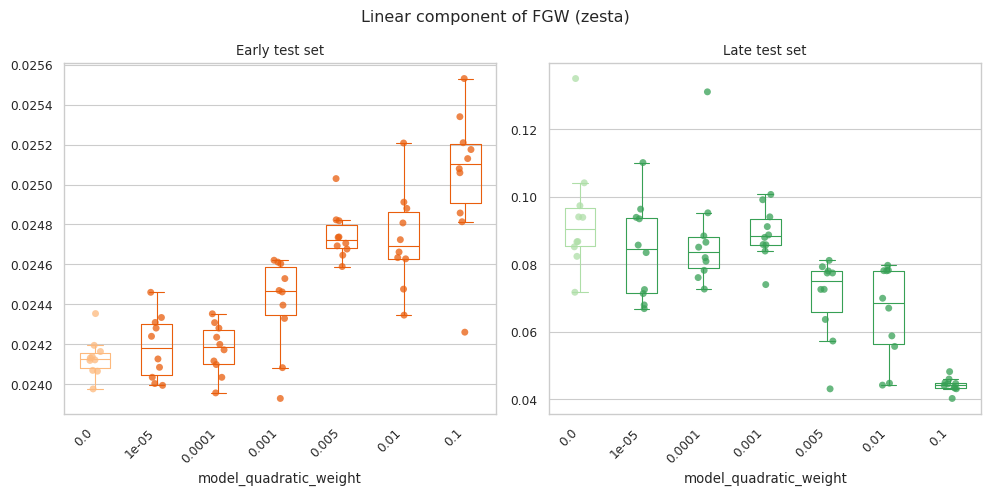

/tmp/ipykernel_468986/217702650.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
/tmp/ipykernel_468986/217702650.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')


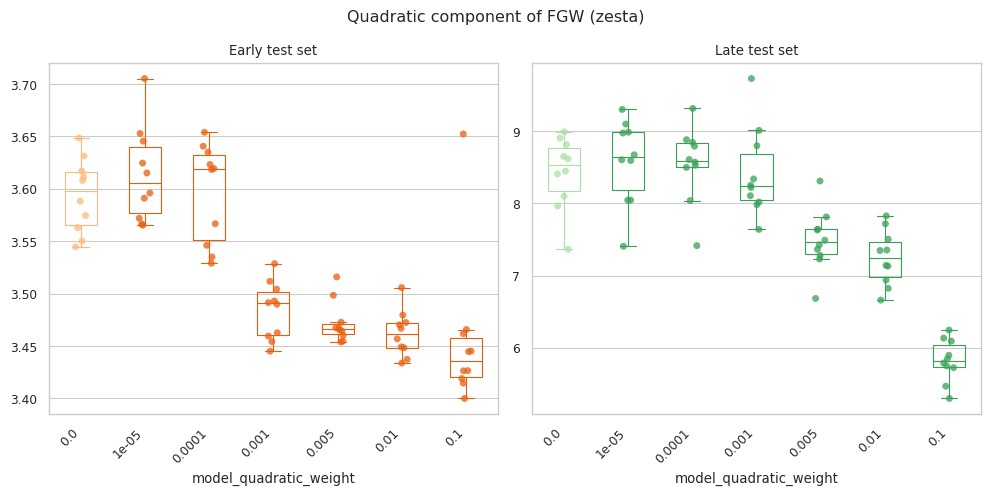

In [32]:
idx = df["checkpoint_path"].str.contains("zesta")
plot_test(
    "Linear component of FGW (zesta)",
    "fgw_early_test_lin_fgw_early_test",
    "fgw_late_test_lin_fgw_late_test",
    idx,
    "zesta_fgw_lin.pdf",
)
plot_test(
    "Quadratic component of FGW (zesta)",
    "fgw_early_test_quad_fgw_early_test",
    "fgw_late_test_quad_fgw_late_test",
    idx,
    "zesta_fgw_quad.pdf",
)

/tmp/ipykernel_468986/217702650.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
/tmp/ipykernel_468986/217702650.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')


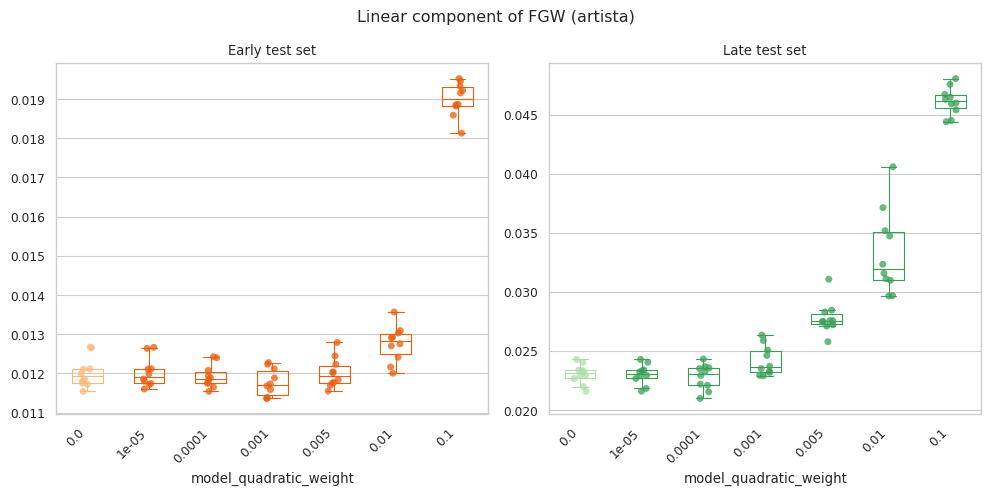

/tmp/ipykernel_468986/217702650.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
/tmp/ipykernel_468986/217702650.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')


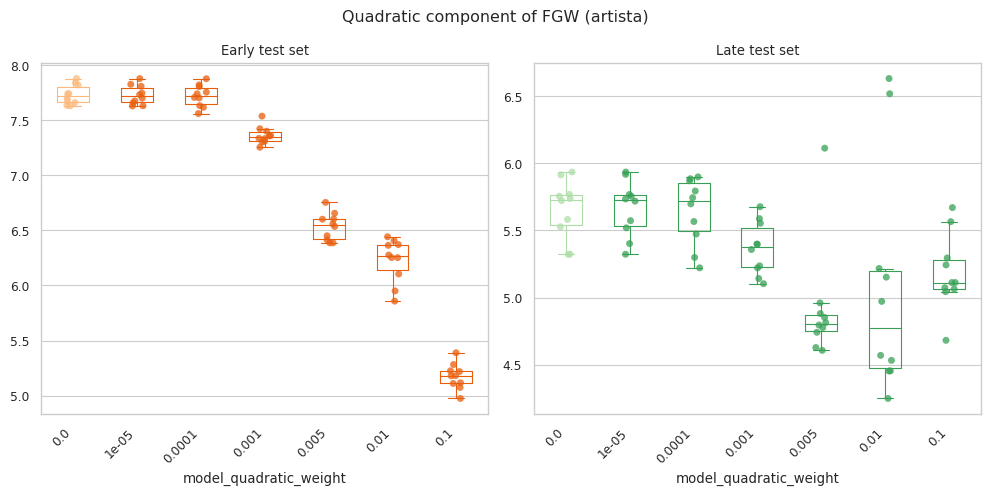

In [33]:
idx = df["checkpoint_path"].str.contains("artista")
plot_test(
    "Linear component of FGW (artista)",
    "fgw_early_test_lin_fgw_early_test",
    "fgw_late_test_lin_fgw_late_test",
    idx,
    "artista_fgw_lin.pdf",
)
plot_test(
    "Quadratic component of FGW (artista)",
    "fgw_early_test_quad_fgw_early_test",
    "fgw_late_test_quad_fgw_late_test",
    idx,
    "artista_fgw_quad.pdf",
)

/tmp/ipykernel_468986/217702650.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
/tmp/ipykernel_468986/217702650.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')


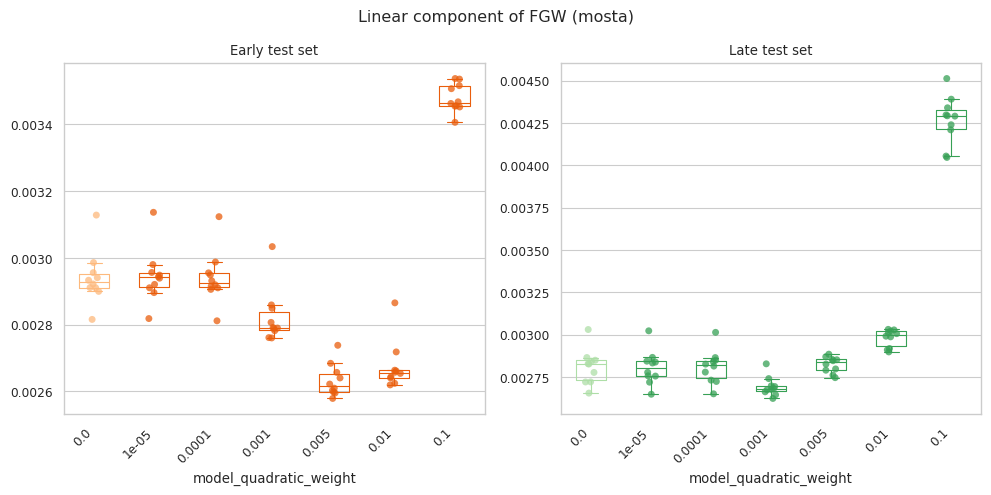

/tmp/ipykernel_468986/217702650.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
/tmp/ipykernel_468986/217702650.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')


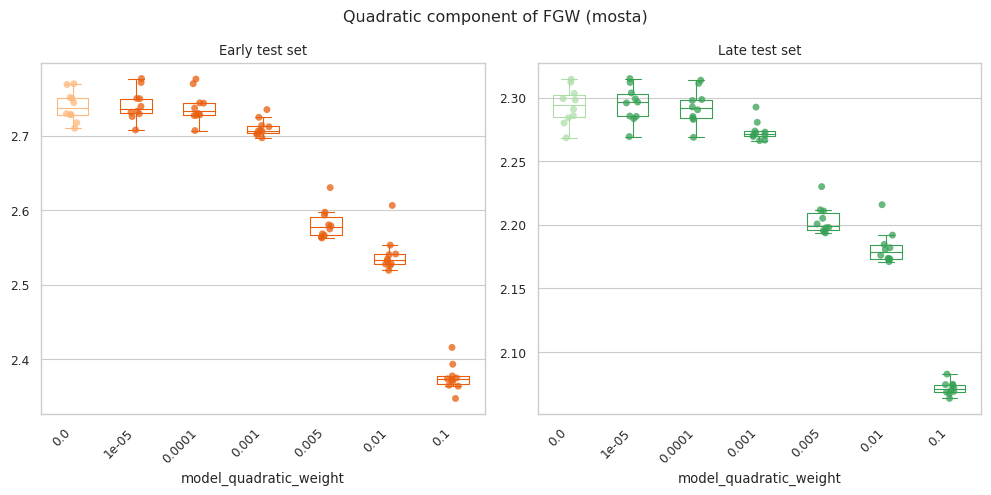

In [34]:
idx = df["checkpoint_path"].str.contains("mosta")
plot_test(
    "Linear component of FGW (mosta)",
    "fgw_early_test_lin_fgw_early_test",
    "fgw_late_test_lin_fgw_late_test",
    idx,
    "mosta_fgw_lin.pdf",
)
plot_test(
    "Quadratic component of FGW (mosta)",
    "fgw_early_test_quad_fgw_early_test",
    "fgw_late_test_quad_fgw_late_test",
    idx,
    "mosta_fgw_quad.pdf",
)